# Hola Cesar!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Análisis exploratorio de datos (Python)

Los resultados de las consultas SQL se almacenan en tres archivos CSV:

- El primero, project_sql_result_01.csv, contiene información sobre las compañías de taxis y el número de viajes que realizaron el 15 y 16 de noviembre de 2017. Se guardará en la variable de trama de datos company_data.
- El segundo, project_sql_result_04.csv, contiene información sobre los barrios de Chicago en los que terminaron los viajes y el número promedio de viajes que terminaron en cada barrio en noviembre de 2017. Se guardará en la variable de trama de datos dropoffs.
- El tercero, project_sql_result_07.csv, contiene información sobre los viajes del Loop al Aeropuerto Internacional O'Hare, incluyendo la fecha y hora de recogida, las condiciones climáticas en el momento en que comenzó el viaje y la duración del viaje en segundos. Se guardará en la variable de trama de datos loop_ohare.

# Tabla de Contenido
1. Información General
2. Análisis Exploratorio de Datos
3. Prueba de Hipótesis
4. Conclusión 

# 1. Información General

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo con la introducción del proyecto, adicional a lo realizado se podría agregar una tabla de contenido con las diferentes secciones del proyecto.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Genial, buen trabajo.
</div>

In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.
</div>

# Compañías

In [2]:
company_data = pd.read_csv('/datasets/project_sql_result_01.csv') 
company_data.head

<bound method NDFrame.head of                        company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]>

In [3]:
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- Observamos que no faltan valores y que la columna presenta los tipos de datos correctos.

In [5]:
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


- Nos encontramos con una media de 2145.48 viajes basado en 64 empresas de Taxi, con un mínimo de 2 viajes.

In [6]:
company_data.describe(include='object')

,company_name
count,64
unique,64
top,5997 - 65283 AW Services Inc.
freq,1


In [7]:
company_data.isna().sum()

company_name    0
trips_amount    0
dtype: int64

- No faltan valores

In [8]:
company_data.duplicated().sum()

0

- No existen duplicados

In [9]:
company_data['company_name'].nunique()

64

- Hay 64 nombres de empresa únicos y un total de 64 filas.

In [10]:
company_data['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

- Podemos trazar un histograma que muestre estos datos de la tabla company_data. Dado que hay 64 empresas de Taxi, podemos hacer el histograma utilizando .hist. Verificaré el rango de valores en la columna trips_amount obteniendo una descripción numérica de la columna.

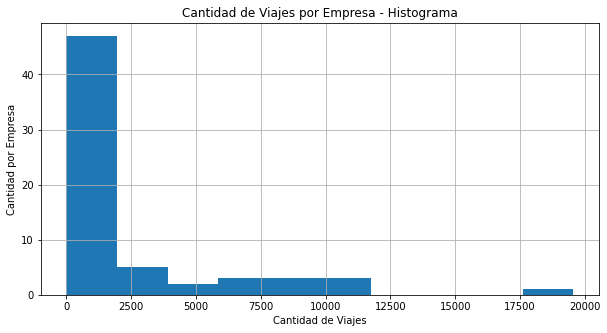

In [11]:
plt.figure(figsize=(10,5))
company_data['trips_amount'].hist()
plt.title('Cantidad de Viajes por Empresa - Histograma')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Cantidad por Empresa')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~La exploración inicial de los datos que realizas es interesante; sin embargo, lo ideal sería que por medio de subtítulos y conclusiones intermedias organices el contenido y diferencias los aspectos que estás explorando.~~</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~Sin ánimo de ser repetitivo, siento que se puede estructurar la exploración de los datos de una mejor manera, en últimas piensa que el objetivo es poder contar una historia con la ayuda de código y de párrafos que orienten el desarrollo del proyecto. No le temas a ser curioso con los datos.~~
</div>

<div class="alert alert-block alert-info">
<b>No entiendo a que te refieres con "explorar por medio de subtítulos y conclusiones intermedias". Esta es la manera que siempre he brindado mis conclusiones (intermedias o finales) durante cada punto a trabajar. Si me puedes brindar un ejemplo te lo agradecería, por que no lo logro comprenderte</b> <a class="tocSkip"></a>
</div>

- En promedio, las empresas de taxis realizaron 2145 viajes. Alrededor del 75% de las empresas realizaron menos de 2106 viajes. Hay algunas empresas que realizaron muchos más viajes, hasta 19,558 viajes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Buen trabajo.</div>

# 3. Análisis Exploratorio de Datos

In [12]:
top10_company = company_data.sort_values(by='trips_amount', ascending=False).head(10)
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Text(0, 0.5, 'Cantidad de Viajes')

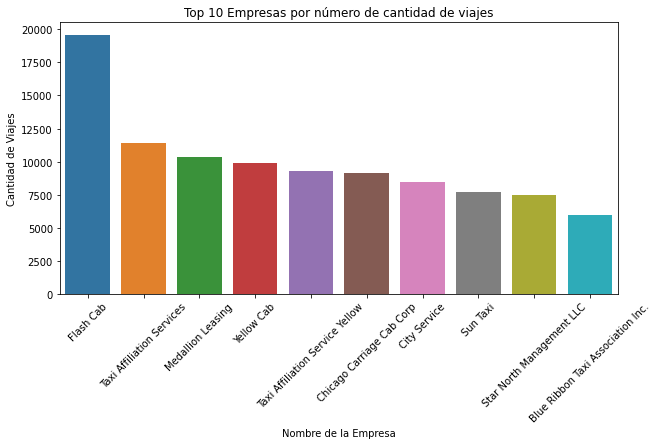

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x="company_name", y="trips_amount", data=top10_company)
plt.title('Top 10 Empresas por número de cantidad de viajes')
plt.xlabel("Nombre de la Empresa")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Viajes")

- El gráfico de barras horizontal es más fácil de leer. Para ello, se utiliza la función plot.barh en lugar de plot.bar. Antes de crear el gráfico, es una buena idea verificar el rango de valores en la columna trips_amount para asegurarnos de que el gráfico sea escalado correctamente. Podemos hacer esto obteniendo una descripción numérica de la columna.

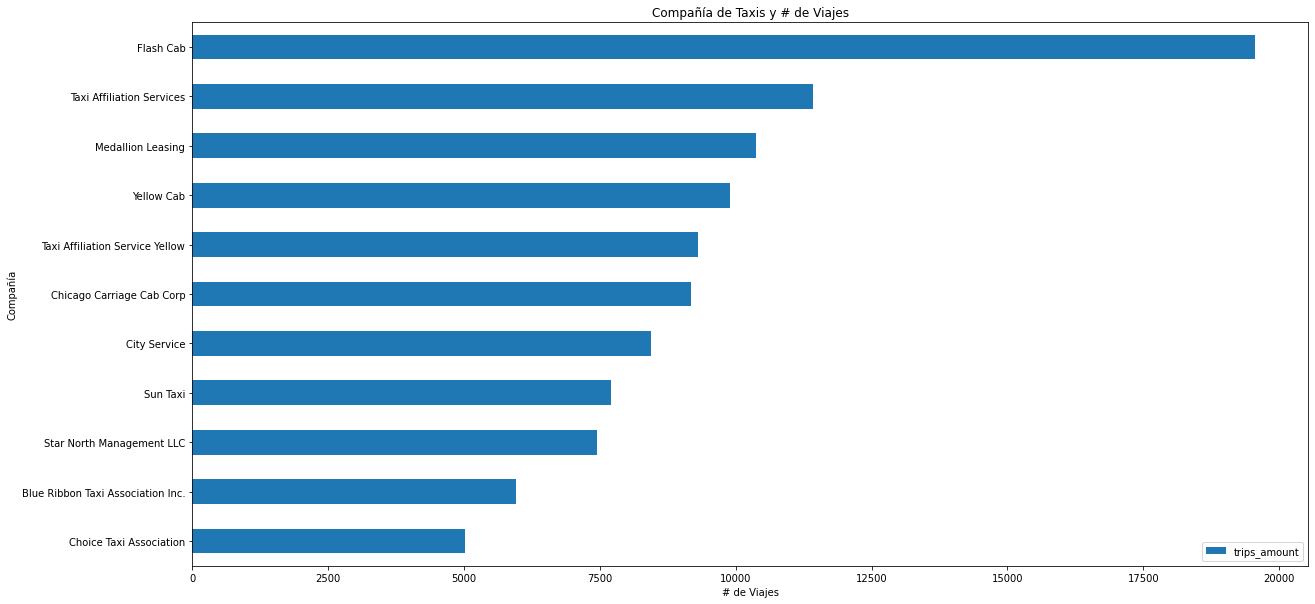

In [14]:
company_data.query('trips_amount >= 5000').sort_values('trips_amount', ascending=False).plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(20, 10))
plt.title('Compañía de Taxis y # de Viajes')
plt.xlabel('# de Viajes')
plt.ylabel('Compañía')
plt.gca().invert_yaxis()
plt.show()

- Se creó un gráfico de barras que muestra el número de viajes realizados por cada empresa, pero solo se incluye las empresas que han realizado al menos 5000 viajes. Para ello, se creó un nuevo conjunto de datos a partir de la tabla company_data que solo incluye las empresas que cumplen con este criterio. Luego, se creó un gráfico de barras horizontal para mostrar el número de viajes realizados por cada empresa en este nuevo conjunto de datos.

- La mayoría de los viajes en taxi son realizados por un pequeño número de empresas. Flash Cab es la empresa de taxis más grande, con una gran ventaja sobre las demás. Es probable que esto se deba a que tienen una mayor flota de taxis en las calles. Si eliminamos las empresas que realizan menos de 5000 viajes, solo quedan 11 empresas en el gráfico. Esto significa que 53 empresas realizan menos del 10% de los viajes en taxi.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Teniendo en cuenta la longitud de caracteres de las categorías, sería interesante que se invirtieran los ejes de la gráfica, de modo que el resultado fuera un gráfico de barras horizontales.~~</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~Buen trabajo. Lo único a tener en cuenta es que por estética y buenas prácticas el orden de la barra está invertido (la de mayor magnitud debería ir arriba)~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Buen trabajo.</div>

In [15]:
company_data['total_trips_percent'] = company_data['trips_amount'] / company_data['trips_amount'].sum() * 100

In [16]:
company_data.sort_values(by='total_trips_percent', ascending=False).head(10)

,company_name,trips_amount,total_trips_percent
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasing,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


- Flash Cab es la compañía de taxis más popular y exitosa del mercado, con casi el doble de viajes que la segunda compañía (Taxi Affiliation Services). Las demás compañías de taxis tienen números muy similares y la competencia es muy marcada.

# Lugares de entrega

In [17]:
dropoffs = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')

In [18]:
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


- Loop es el lugar más popular, seguido de River North, Streeterville y West Loop.

In [19]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- El único problema es que la columna average_trips es de tipo float. Tenemos que redondear los valores y cambiar el tipo a entero.

In [48]:
dropoffs['average_trips'] = dropoffs['average_trips'].round()
dropoffs['average_trips'] = dropoffs['average_trips'].astype('int')

dropoffs.head()

,dropoff_location_name,average_trips,total_trips_percent
0,Loop,10727,19.021798
1,River North,9524,16.887236
2,Streeterville,6665,11.817696
3,West Loop,5164,9.156143
4,O'Hare,2547,4.516128


- El Top 10 de lugares de entrega

In [20]:
top10 = dropoffs.sort_values(by='average_trips', ascending=False).head(10)
top10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


- Los 10 principales lugares o barrios de bajada en función del número de viajes: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campud, Gold Coast y Sheffield & De Paul.

In [21]:
dropoffs.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [22]:
dropoffs.describe(include='object')

,dropoff_location_name
count,94
unique,94
top,Grand Crossing
freq,1


In [23]:
dropoffs.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

- No hacen falta valores

In [24]:
dropoffs['dropoff_location_name'].nunique()

94

- Existen 94 diferentes lugares de reparto

In [25]:
dropoffs['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

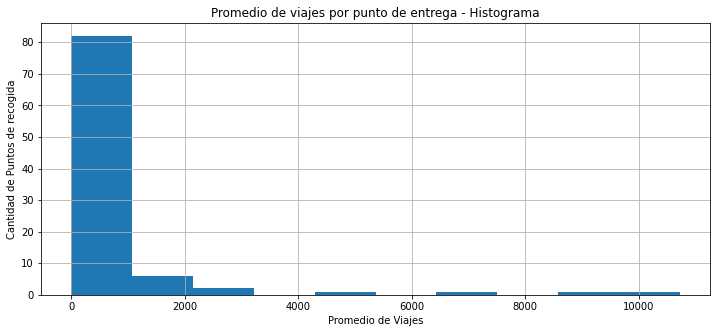

In [26]:
plt.figure(figsize=(12,5))
dropoffs['average_trips'].hist()
plt.title('Promedio de viajes por punto de entrega - Histograma')
plt.xlabel("Promedio de Viajes")
plt.ylabel("Cantidad de Puntos de recogida")
plt.show()

- En promedio, cada lugar de entrega de taxis recibe 600 viajes al mes. El 75% de los lugares de entrega reciben menos de 299 viajes al mes. Sin embargo, hay algunos lugares atípicos que reciben muchos más viajes, hasta 10727 viajes al mes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~La exploración inicial de los datos que realizas es interesante; sin embargo, lo ideal sería que por medio de subtítulos y conclusiones intermedias organices el contenido y diferencias los aspectos que estás explorando.~~</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
~~Reitero el primer nuevo comentario que te realice en esta revisión.~~</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Buen trabajo.</div>

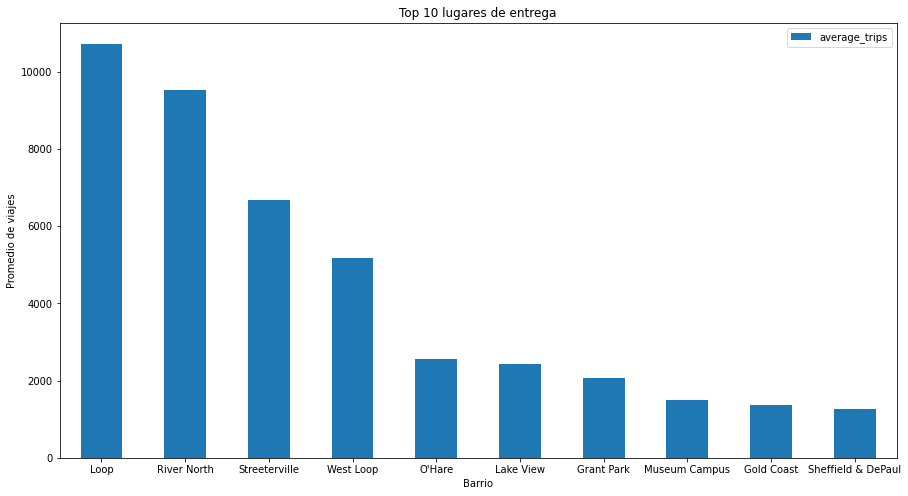

In [27]:
top10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(15,8))
plt.title('Top 10 lugares de entrega')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.show()

- La mayoría de la gente que toma un taxi en Chicago se dirige a los barrios de Loop, River North, Streeterville y West Loop. El destino menos popular es Sheffield & DePaul. Hay una gran diferencia entre los cuatro destinos más populares y el resto; el cuarto más popular (West Loop) tiene aproximadamente el doble de visitas que O'Hare (el quinto más popular).

- En otras palabras, la mayoría de los viajes en taxi en Chicago son cortos, dentro de la ciudad. Los destinos más populares son los barrios comerciales y de entretenimiento del centro de la ciudad. El aeropuerto O'Hare, que se encuentra en las afueras de la ciudad, es el quinto destino más popular.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo.</div>

- Los 10 barrios con mayor número de viajes/bajadas.

In [28]:
dropoffs['total_trips_percent'] = dropoffs['average_trips'] / dropoffs['average_trips'].sum() * 100
dropoffs.sort_values(by='total_trips_percent', ascending=False).head(10)

,dropoff_location_name,average_trips,total_trips_percent
0,Loop,10727.466667,19.021798
1,River North,9523.666667,16.887236
2,Streeterville,6664.666667,11.817696
3,West Loop,5163.666667,9.156143
4,O'Hare,2546.900000,4.516128
5,Lake View,2420.966667,4.292825
6,Grant Park,2068.533333,3.667895
7,Museum Campus,1510.000000,2.677511
8,Gold Coast,1364.233333,2.419040
9,Sheffield & DePaul,1259.766667,2.233801


- Para encontrar las ubicaciones de entrega más populares, se ordenaron la tabla dropoffs por la columna average_trips en orden descendente. Esto significa que las ubicaciones de entrega con el mayor número promedio de viajes aparecen en la parte superior de la lista.

In [29]:
dropoffs.iloc[0:4]['total_trips_percent'].sum()

56.88287378682103

- Los 4 principales lugares de bajada (Loop, River North, Streeterville y West Loop) representan el 56.88% del total de viajes de todos los lugares de bajadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo.</div>

# Loop O'hare

In [30]:
loop_ohare = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

In [31]:
loop_ohare.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [32]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- Necesitamos cambiar el tipo de datos de la columna start_ts a fecha y hora. Para ello, podemos usar el método pd.to_datetime(). El argumento format especifica el formato de la fecha y hora en los datos. En nuestro caso, el formato es '%Y%m%d %H%M%S', que representa el año, el mes, el día, la hora, los minutos y los segundos, respectivamente.

In [33]:
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

- Cambio de start_ts dtype a datetime

In [34]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [35]:
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [36]:
loop_ohare.describe(include='object')

,weather_conditions
count,1068
unique,2
top,Good
freq,888


In [37]:
loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [38]:
loop_ohare['weather_conditions'].value_counts()/len(loop_ohare)*100

Good    83.146067
Bad     16.853933
Name: weather_conditions, dtype: float64

- La mayoría de los días en Chicago tienen buen tiempo (83,15%), con solo una pequeña proporción de días de mal tiempo (16,85%).

In [39]:
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [40]:
loop_ohare['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

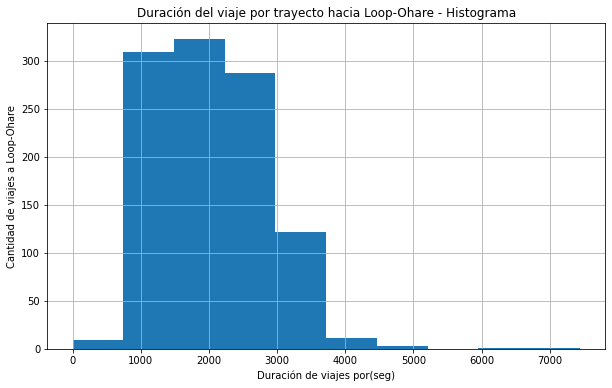

In [41]:
plt.figure(figsize=(10,6))
loop_ohare['duration_seconds'].hist()
plt.title('Duración del viaje por trayecto hacia Loop-Ohare - Histograma')
plt.xlabel("Duración de viajes por(seg)")
plt.ylabel("Cantidad de viajes a Loop-Ohare")
plt.show()

- En promedio, los viajes del Loop a O'Hare duran unos 2,071 segundos osea 34 minutos. El 75% de los viajes duran menos de 2,580 segundos osea 43 minutos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La exploración inicial de los datos que realizas es interesante; sin embargo, lo ideal sería que por medio de subtítulos y conclusiones intermedias organices el contenido y diferencias los aspectos que estás explorando.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Reitero el primer nuevo comentario que te realice en esta revisión.</div>

# Conclusión

- Flash Cab es la empresa de taxis más popular y líder del mercado, casi duplicando a la segunda. Las demás empresas de taxis están muy juntas y hay una gran competencia.

- RC Andrews Cab o Felman Cop (empresas menos populares) deberían adaptar el modelo de Flash Cab o asociarse con ellos para entender mejor qué es lo que los hace realmente diferentes de las demás empresas de taxis de Chicago.

- Loop es el lugar de entrega más popular, seguido de River North, Streeterville y West Loop. Estos cuatro barrios representan más de la mitad de todos los viajes en taxi. Al parecer, estos cuatro barrios están todos cerca unos de otros, en el centro de la ciudad.

- En Loop O'Hare, en noviembre de 2017, hubo 888 días de buen tiempo, lo que representa el 83,15%, y 180 días de mal tiempo, lo que representa el 16,85%.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Te felicito, generas conclusiones interesantes para el caso.</div>

# 3. Prueba de hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Decide por tu cuenta dónde establecer el nivel de significación (alfa).
Explica:
- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

- HN (hipótesis nula): La duración media de los viajes desde el barrio del Loop al Aeropuerto Internacional O'Hare en días de buen tiempo NO es igual a la duración media de los viajes en días de mal tiempo.

- HA (hipótesis alternativa): La duración media de los viajes desde el barrio del Loop al Aeropuerto Internacional O'Hare en días de buen tiempo SI es igual a la duración media de los viajes en días de mal tiempo.

- Nivel de confianza: 95% (alfa del 5%)

In [42]:
alpha = 0.05

muestra_buen_clima = loop_ohare.query('weather_conditions == "Good"')['duration_seconds']
muestra_mal_clima = loop_ohare.query('weather_conditions == "Bad"')['duration_seconds']

- Creé dos nuevos conjuntos de datos a partir de la tabla original. El primer conjunto de datos incluirá solo las filas donde el valor en la columna weather_conditions es "Bueno". El segundo conjunto de datos incluirá solo las filas donde el valor en la columna weather_conditions es "Malo".

In [43]:
st.levene(muestra_buen_clima, muestra_mal_clima, center='mean')

LeveneResult(statistic=0.7184273561022895, pvalue=0.3968505113995001)

- Los dos grupos de datos tienen la misma variabilidad. En otras palabras, los datos de los dos grupos están distribuidos de manera similar.

In [44]:
results = st.ttest_ind(muestra_buen_clima,muestra_mal_clima, equal_var=True)

print('muestra de buen clima - media: ', muestra_buen_clima.mean())
print('muestra de mal clima - media: ',muestra_mal_clima.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")

muestra de buen clima - media:  1999.6756756756756
muestra de mal clima - media:  2427.2055555555557
p-value:  6.517970327099473e-12
Rechazamos la hipótesis nula


# Conclusión de hipótesis:

- Con un nivel de confianza del 95%, rechazamos la hipótesis nula, por lo que la duración media de los viajes desde el barrio del Loop al Aeropuerto Internacional O'Hare en días de buen tiempo no es igual a la duración media de los viajes en días de mal tiempo. Esto significa que la duración media de los viajes desde el Loop al Aeropuerto Internacional O'Hare cambia los sábados de lluvia.

- La duración de los viajes en días de mal tiempo es mayor que en días de buen tiempo.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo planteando y desarrollando la prueba de hipótesis, tienes en cuenta componentes y supuestos fundamentales para desarrollarla.</div>

# 4. Conclusión Final:
- Flash Cab es la empresa de taxis más popular en Chicago. Las demás compañías deberían aprender de ellos o asociarse con ellos para entender por qué son tan exitosos.

- La mayoría de los viajes en taxi en Chicago se realizan en la zona del Loop y sus alrededores. Las demás compañías deberían operar más en esta zona o buscar oportunidades en otras zonas que no están bien cubiertas por las empresas de taxis actuales.

- El clima afecta a la duración de los viajes. Los viajes son más largos en mal tiempo. Las demás compañías deberían considerar cambiar los precios en función del clima, ya que los viajes más largos significan que el taxi está ocupado y hay menos oferta.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola Cesar. Te felicito por el trabajo desarrollado hasta el momento, he dejado comentarios para que puedas tener en cuenta.~~
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
~~Hola Cesar. He dejado comentarios etiquetados con el #2 para que puedas tener en cuenta.~~</div>

<div class="alert alert-block alert-info">
<b>Se invirtió la gráfica de mayor a menos, pero con los demás punto repito que no entiendo a que te refieres con "explorar por medio de subtítulos y conclusiones intermedias". Esta es la manera que siempre he brindado mis conclusiones (intermedias o finales) durante cada punto a trabajar. Si me puedes brindar un ejemplo te lo agradecería, por que no lo logro comprenderte</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
# Comentario General #3
~~Es básicamente lo que estás haciendo, pero un poco más extenso, esto puesto que realizas un buen código, con el cual tenemos la oportunidad de profundizar más en las conclusiones.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
# Comentario General #4
    
Buen trabajo, te felicito por el desarollo del proyeto.
</div>